In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# %%

# Load the dataset
df = pd.read_csv('../data/train.csv')

In [ ]:
# %%

# Select top correlated numerical features
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(6).index

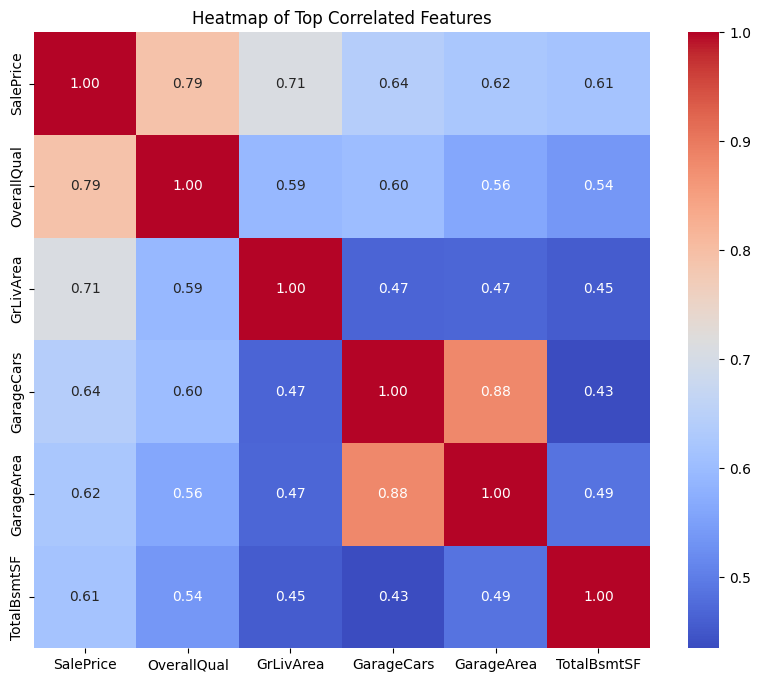

In [ ]:
# %%

# Heatmap of selected top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Top Correlated Features")
plt.savefig("../fig/eda/heatmap_top_corr.png")
plt.show()
plt.close()

# %% [markdown]

 There are quite a few variables that have codependent, which means that some features may not be neccessary for our model. To reduce redundant information, applying PCA may be a good idea or having some regularization technique would work too.

In [ ]:
# %%

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[top_corr.drop('SalePrice')]  # Exclude target if included
X = add_constant(X)
vif_df = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif_df)

       feature        VIF
0        const  20.763512
1  OverallQual   2.121878
2    GrLivArea   1.649760
3   GarageCars   4.920957
4   GarageArea   4.831138
5  TotalBsmtSF   1.565139


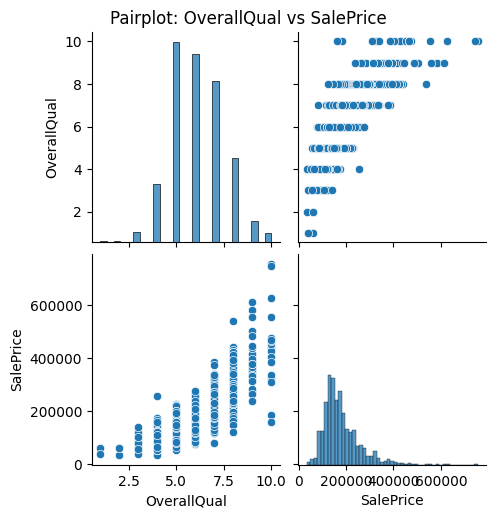

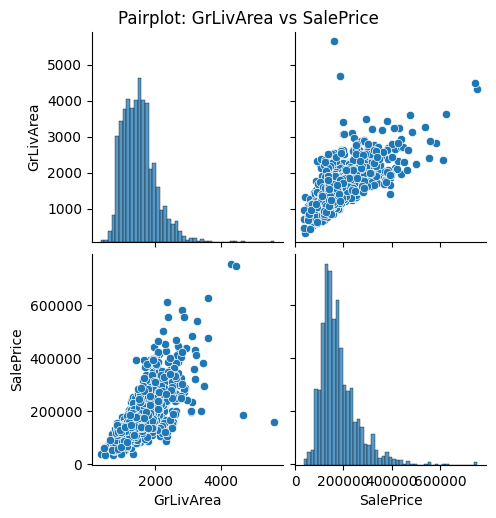

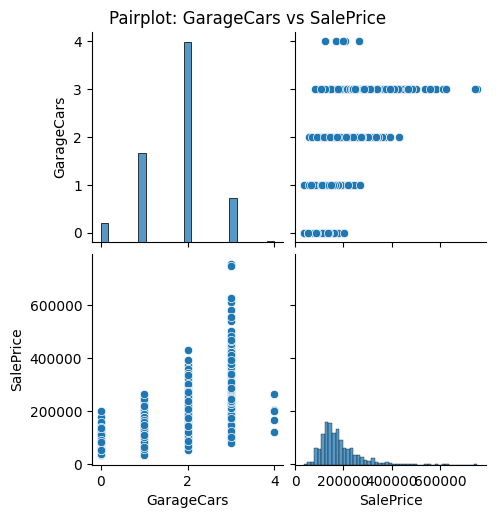

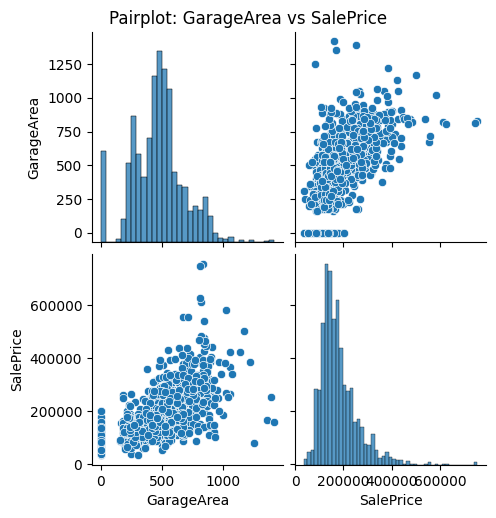

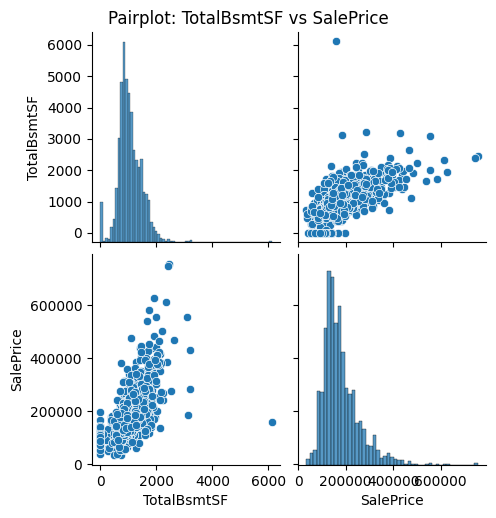

In [ ]:
# %%

# Individual pairplots for each top correlated feature vs SalePrice
for feature in top_corr:
    if feature != 'SalePrice':
        sns.pairplot(df[[feature, 'SalePrice']])
        plt.suptitle(f"Pairplot: {feature} vs SalePrice", y=1.02)
        plt.savefig(f"../fig/eda/pairplot_{feature}.png")
        plt.show()
        plt.close()